### 

### 如何查看箱线图中的异常数据

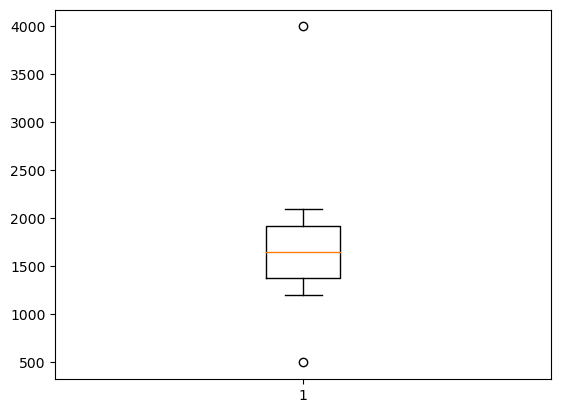

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 示例数据
data = [1200, 1300, 1400, 500, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 4000]
df = pd.DataFrame(data, columns=['values'])

# 绘制箱线图
plt.boxplot(df['values'], showfliers=True)  # showfliers=True 显示异常值
plt.show()

In [13]:
df

,values
0,1200
1,1300
2,1400
3,500
4,1500
5,1600
6,1700
7,1800
8,1900
9,2000


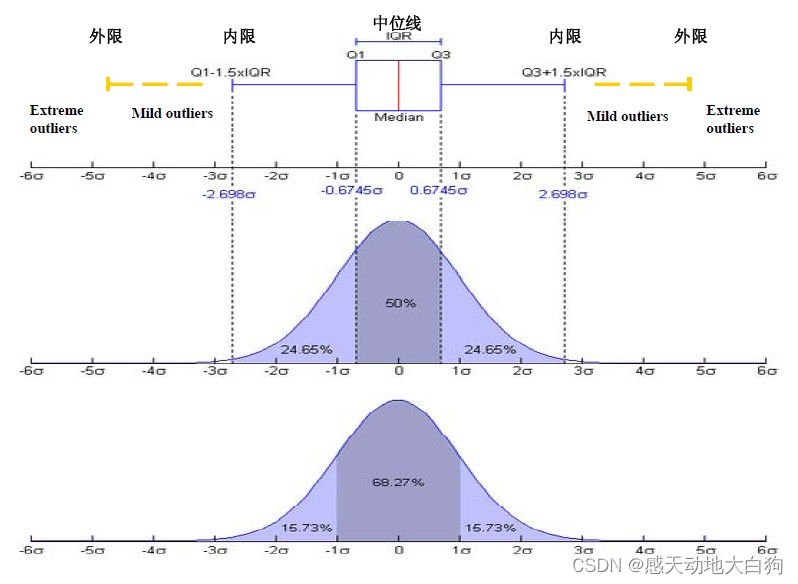

In [15]:
Q1 = df['values'].quantile(0.25) # quantile用于计算数据的分位数
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1  # IQR 两个四分位值的跨度

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]
print("异常值：")
outliers

异常值：


,values
3,500
11,4000


In [6]:
df['values'] < lower_bound,df['values'] > upper_bound

(0     False
 1     False
 2     False
 3      True
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 Name: values, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11     True
 Name: values, dtype: bool)

In [7]:
df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]

,values
3,500
11,4000


### clip方法处理数据异常值如何操作的？

In [9]:
import pandas as pd

# 创建一个包含异常值的序列
data = pd.Series([1, 2, 3, 4, 100, 5])
print(data)
# 使用 clip 方法限制值在 0 到 10 之间
clipped_data = data.clip(lower=0, upper=10)

print(clipped_data)

0      1
1      2
2      3
3      4
4    100
5      5
dtype: int64
0     1
1     2
2     3
3     4
4    10
5     5
dtype: int64


In [12]:
import pandas as pd

# 创建一个包含异常值的 DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 100, 5],
    'B': [10, 20, 30, 40, 50,80]
})

# 使用 clip 方法限制值在 0 到 10 之间
clipped_df = df.clip(lower=0, upper=10)

print(clipped_df)

    A   B
0   1  10
1   2  10
2   3  10
3   4  10
4  10  10
5   5  10


它将序列中所有小于最小值的元素设置为最小值，将所有大于最大值的元素设置为最大值。

###  如何将时间索引列 增加小时数据

2015-07-02  ---》    2015-07-02 00:00:00

datac.index
```
DatetimeIndex(['2015-07-02', '2015-07-02', '2015-07-02', '2015-07-02',
               '2015-07-02', '2015-07-02', '2015-07-02', '2015-07-02',
               '2015-07-02', '2015-07-02',
               ...
               '2022-03-13', '2022-03-13', '2022-03-13', '2022-03-13',
               '2022-03-13', '2022-03-13', '2022-03-13', '2022-03-13',
               '2022-03-13', '2022-03-13'],
              dtype='datetime64[ns]', name='date', length=58728, fre

```
time = data.copy()
```
# 生成精确到小时的新索引
# 原数据示例索引
original_dates = pd.DatetimeIndex(time.index)

new_index = pd.date_range(
    start='2015-07-02 00:00:00',
    periods=len(original_dates),
    freq='H'
)

time.index = new_index
```
time.index
```
DatetimeIndex(['2015-07-02 00:00:00', '2015-07-02 01:00:00',
               '2015-07-02 02:00:00', '2015-07-02 03:00:00',
               '2015-07-02 04:00:00', '2015-07-02 05:00:00',
               '2015-07-02 06:00:00', '2015-07-02 07:00:00',
               '2015-07-02 08:00:00', '2015-07-02 09:00:00',
               ...
               '2022-03-13 14:00:00', '2022-03-13 15:00:00',
               '2022-03-13 16:00:00', '2022-03-13 17:00:00',
               '2022-03-13 18:00:00', '2022-03-13 19:00:00',
               '2022-03-13 20:00:00', '2022-03-13 21:00:00',
               '2022-03-13 22:00:00', '2022-03-13 23:00:00'],
              dtype='datetime64[ns]', length=58728, freq='H')
```q=None)

In [1]:
conda install xgboost

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ANACONDA\envs\tensorflow

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  defaults
    libxgboost-2.1.1           |       h585ebfc_0         2.7 MB  defaults
    py-xgboost-2.1.1           |   py38haa95532_0         274 KB  defaults
    xgboost-2.1.1              |   py38haa95532_0          12 KB  defaults
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/pkgs/main/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         anaconda/pkgs/main/win-64::libxgboost-2.1.1-h58

In [8]:
import pandas as pd
import numpy as np

# 创建时间序列数据
time_index = pd.date_range(start='2024-01-01', periods=5, freq='D')
data = pd.DataFrame({
    'A': [1125, 2522, np.nan, 3561, 7895],
    'B': [10, np.nan, np.nan, 40, 50]
}, index=time_index)

# 时间序列插值
interpolated_data = data.interpolate(method='linear')
interpolated_data

,A,B
2024-01-01,1125.0,10.0
2024-01-02,2522.0,20.0
2024-01-03,3041.5,30.0
2024-01-04,3561.0,40.0
2024-01-05,7895.0,50.0


In [6]:
import pandas as pd
import numpy as np

# 创建时间序列数据
time_index = pd.date_range(start='2024-01-01', periods=5, freq='D')
data = pd.DataFrame({
    'A': [1125, 2522, np.nan, 3561, 7895],
    'B': [10, np.nan, np.nan, 40, 50]
}, index=time_index)

# 时间序列插值
interpolated_data = data.interpolate(method='time')
interpolated_data

,A,B
2024-01-01,1125.0,10.0
2024-01-02,2522.0,20.0
2024-01-03,3041.5,30.0
2024-01-04,3561.0,40.0
2024-01-05,7895.0,50.0


##  梯度差分

In [9]:
import pandas as pd

# 示例数据
data = {
    'temp1': [20, 21, 22],
    'temp2': [22, 23, 24],
    'temp3': [24, 25, 26]
}
df = pd.DataFrame(data)

# 定义温度列
temp_cols = ['temp1', 'temp2', 'temp3']

# 计算时间梯度
df['temp_gradient'] = df[temp_cols].diff(axis=1).mean(axis=1)

df

,temp1,temp2,temp3,temp_gradient
0,20,22,24,2.0
1,21,23,25,2.0
2,22,24,26,2.0


在 Pandas 中，`diff()` 方法用于计算序列或数据框中相邻元素之间的差值。下面结合你提供的代码详细解释 `diff(axis=1)` 是如何计算的。

### 代码回顾
```python
import pandas as pd

# 示例数据
data = {
    'temp1': [20, 21, 22],
    'temp2': [22, 23, 24],
    'temp3': [24, 25, 26]
}
df = pd.DataFrame(data)

# 定义温度列
temp_cols = ['temp1', 'temp2', 'temp3']

# 计算时间梯度
df['temp_gradient'] = df[temp_cols].diff(axis=1).mean(axis=1)

print(df)
```

### `diff(axis=1)` 的计算过程

#### 1. 选取指定列
首先，`df[temp_cols]` 从数据框 `df` 中选取了 `temp1`、`temp2` 和 `temp3` 这三列，得到一个新的数据框：
```
   temp1  temp2  temp3
0     20     22     24
1     21     23     25
2     22     24     26
```

#### 2. 沿列方向进行差分计算（`axis=1`）
`diff(axis=1)` 表示沿着列的方向进行差分计算，也就是对于每一行，计算相邻列之间的差值。具体计算过程如下：

- **第一行**：
    - 对于 `temp1` 列，由于它是第一列，没有前一列与之相减，所以差分结果为 `NaN`。
    - `temp2 - temp1 = 22 - 20 = 2`
    - `temp3 - temp2 = 24 - 22 = 2`

- **第二行**：
    - `temp1` 列差分结果为 `NaN`。
    - `temp2 - temp1 = 23 - 21 = 2`
    - `temp3 - temp2 = 25 - 23 = 2`

- **第三行**：
    - `temp1` 列差分结果为 `NaN`。
    - `temp2 - temp1 = 24 - 22 = 2`
    - `temp3 - temp2 = 26 - 24 = 2`

计算得到的差分结果数据框如下：
```
   temp1  temp2  temp3
0    NaN      2      2
1    NaN      2      2
2    NaN      2      2
```

#### 3. 沿行方向计算平均值（`mean(axis=1)`）
在得到差分结果数据框后，`mean(axis=1)` 会沿着行的方向计算每一行的平均值。由于每一行的第一个元素是 `NaN`，在计算平均值时，`NaN` 会被忽略。

- **第一行**：`(2 + 2) / 2 = 2`
- **第二行**：`(2 + 2) / 2 = 2`
- **第三行**：`(2 + 2) / 2 = 2`

最终得到的 `temp_gradient` 列的值都是 2，完整的数据框如下：
```
   temp1  temp2  temp3  temp_gradient
0     20     22     24              2
1     21     23     25              2
2     22     24     26              2
```

### 总结
`diff(axis=1)` 会沿着列的方向对每一行的相邻元素进行减法运算，得到相邻列之间的差值。第一列由于没有前一列与之相减，差分结果为 `NaN`。在计算平均值时，`NaN` 会被忽略。

### 滞后特征

In [17]:
import pandas as pd

# 示例数据
data = {
    'load': [i for i in range(1, 26)]
}
df = pd.DataFrame(data)

# 创建滞后特征
df['load_lag24'] = df['load'].shift(24)

df


,load,load_lag24
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [21]:
df[0:1]

,load,load_lag24
0,1,NaN


'''

在这个示例中，load 列有 25 个值，当我们创建 load_lag24 列时，前 24 个值会被填充为 NaN，
因为没有对应的前 24 个时间步的数据，第 25 个值会是 load 列的第 1 个值。

'''

In [ ]:
conda install lightgbm

### 利用滑动窗口法来制作时序数据集

- 参考网址

[利用滑动窗口法来制作时序数据集](https://blog.csdn.net/Stanford_sun/article/details/134675309)

设训练数据集是一个100*1的序列，使用24个数据预测未来的1个数据，那么滑窗操作就将原数据做了这样的变换：

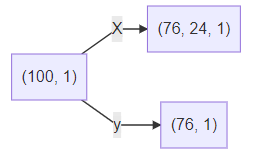

单特征的构造 如下图   多特征的不同在于  特征数量不同
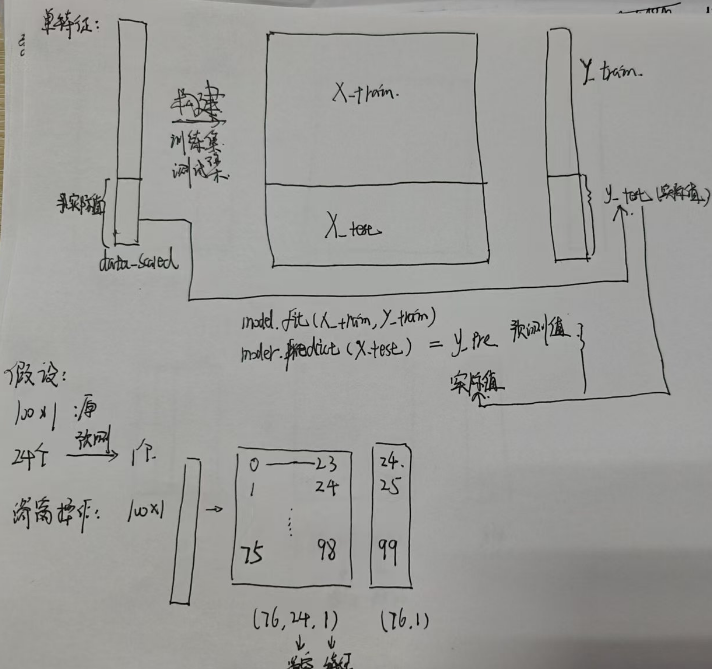

### numpy的split()方法

> 本文使用的数据集shape为（1442,8） numpy 的 split 函数将单日数据重采样成以周为单位的训练样本，因此，训练数据的shape变为(159, 7, 8)   如何变换的

In [27]:
import numpy as np

# 示例数据
train = np.arange(56).reshape(28, 2)  # 创建一个28x1的数组

# 将数据划分为按周为单位的数据
train_weekly = np.array(np.split(train, len(train) // 7))

print(train_weekly.shape)  # 输出：(4, 7, 1)

(4, 7, 2)


In [28]:
train

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29],
       [30, 31],
       [32, 33],
       [34, 35],
       [36, 37],
       [38, 39],
       [40, 41],
       [42, 43],
       [44, 45],
       [46, 47],
       [48, 49],
       [50, 51],
       [52, 53],
       [54, 55]])

In [29]:
train_weekly

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13]],

       [[14, 15],
        [16, 17],
        [18, 19],
        [20, 21],
        [22, 23],
        [24, 25],
        [26, 27]],

       [[28, 29],
        [30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39],
        [40, 41]],

       [[42, 43],
        [44, 45],
        [46, 47],
        [48, 49],
        [50, 51],
        [52, 53],
        [54, 55]]])